### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

plt.style.use('fivethirtyeight')

Importing plotly failed. Interactive plots will not work.


## Importing Tesla daily stock exchange values from 2010 IPO onwards

In [2]:
df_TSLA = pd.read_csv('../DataSets/Stocks_raw_data/TSLA_stocks_rate_2010-01-01_to_2020-03-08.csv', index_col='Date')

In [3]:
df_TSLA['PCT_change'] = df_TSLA['Adj Close'].pct_change(fill_method='ffill')

In [4]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price,PCT_change
Date,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000,-0.002511
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000,-0.078473
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000,-0.125683
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000,-0.160938
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999,-0.019243
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000,0.105063
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999,-0.003436
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000,-0.020115


Adding PCT_change i.e. percetange change evolution from one day to another to measure the general trend of each day

In [5]:
df_TSLA

,High,Low,Open,Close,Volume,Adj Close,avg_price,PCT_change
Date,,,,,,,,
2010-06-29,25.000000,17.540001,19.000000,23.889999,18766300.0,23.889999,21.270000,NaN
2010-06-30,30.420000,23.299999,25.790001,23.830000,17187100.0,23.830000,26.860000,-0.002511
2010-07-01,25.920000,20.270000,25.000000,21.959999,8218800.0,21.959999,23.095000,-0.078473
2010-07-02,23.100000,18.709999,23.000000,19.200001,5139800.0,19.200001,20.905000,-0.125683
2010-07-06,20.000000,15.830000,20.000000,16.110001,6866900.0,16.110001,17.915000,-0.160938
2010-07-07,16.629999,14.980000,16.400000,15.800000,6921700.0,15.800000,15.804999,-0.019243
2010-07-08,17.520000,15.570000,16.139999,17.459999,7711400.0,17.459999,16.545000,0.105063
2010-07-09,17.900000,16.549999,17.580000,17.400000,4050600.0,17.400000,17.224999,-0.003436
2010-07-12,18.070000,17.000000,17.950001,17.049999,2202500.0,17.049999,17.535000,-0.020115


In [6]:
df_TSLA.dtypes

High          float64
Low           float64
Open          float64
Close         float64
Volume        float64
Adj Close     float64
avg_price     float64
PCT_change    float64
dtype: object

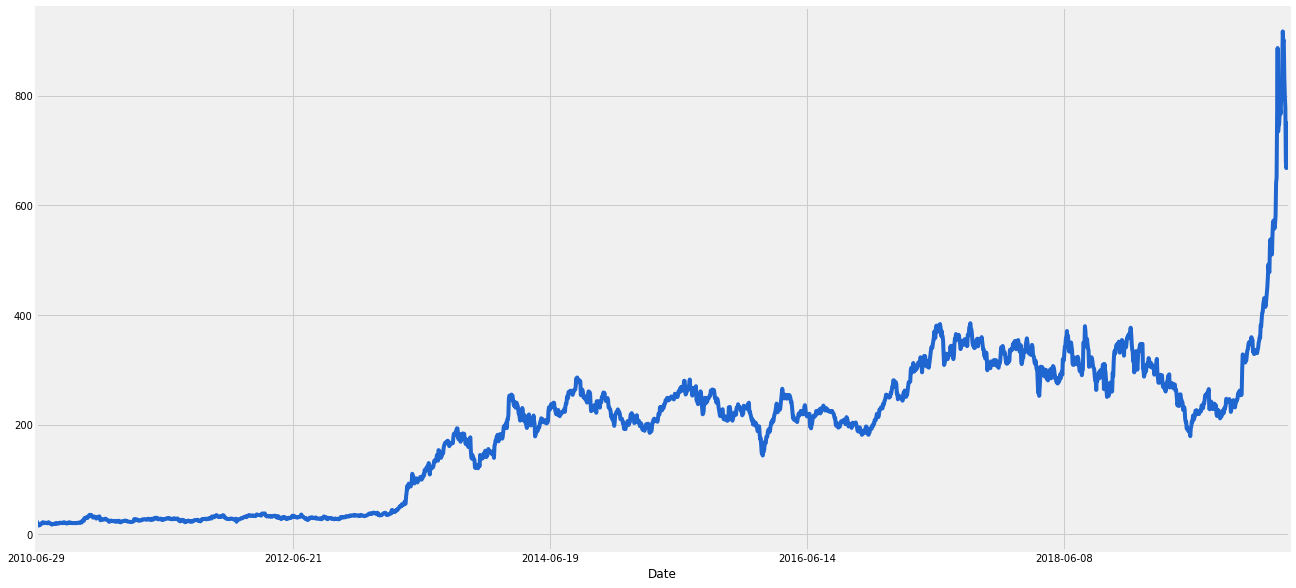

In [7]:
df_TSLA['Adj Close'].plot(figsize=(20,10), c=np.random.rand(3))

## Part 1 - Comparison of Car sales VS. Evolution of the car production

### Data Wrangling & Data Analytics

The first part of the Notebook aims at comparing the Car Production dataframe 

- Data wrangling : creating a compatible dataframe with the stock price (merging both KPIs into a Quarter-based dataframe : adapting the daily stock price evolution into a quarter trend to be merged with the quarterly based car production data)
- ploting the parallel evolution of the two indicators
- calculating the correlation of both indicators

### Importing Tesla Car Sales Dataframe to measure its impact

The car production is divided into three columns :
- sales of so-called "Luxury car", encompassing both Model S (launched in 2012) & Model X (launched in 2015), which target a premium audience, in order to prove the viability of the electric car concept and to create strong brand attachment
- sales of Model 3, aiming to be the "Mass-market" electric car, which production started in 2017 and became the flagship of the brand. Due to what Musk called "production hell", the first quarter of production were complicated, mobilised the entire production lines, and took over the production of the Luxury Car
- All model sales : sum of two previous categories, used in Part 2 to be used with the Prophet Machine Learning algorithm

In [8]:
tesla_car_sales = pd.read_csv('../DataSets/Tesla_car_sales/tesla_total_sales_2008_2019.csv')

In [9]:
# #Adding Month name to be able to plot it versus Stock quarter
# condlist = [tesla_car_sales['Quarter'] ==1, tesla_car_sales['Quarter'] ==2, tesla_car_sales['Quarter'] ==3, tesla_car_sales['Quarter'] ==4]
# choicelist = ["January", "April", "July", "October"]
# tesla_car_sales['Month'] = np.select(condlist, choicelist)

In [10]:
#adding fusioned year quarter
tesla_car_sales['Year_Q'] = tesla_car_sales["Year"].astype(str) + ' Q'+ tesla_car_sales["Quarter"].astype(str)

In [11]:
tesla_car_sales

,Year,Quarter,Model 3 sales,Luxury Models sold,Year_Q
0,2008,2,0,3,2008 Q2
1,2008,3,0,27,2008 Q3
2,2008,4,0,70,2008 Q4
3,2009,1,0,220,2009 Q1
4,2009,2,0,180,2009 Q2
5,2009,3,0,200,2009 Q3
6,2009,4,0,300,2009 Q4
7,2010,1,0,100,2010 Q1
8,2010,2,0,100,2010 Q2
9,2010,3,0,100,2010 Q3


In [12]:
tesla_car_sales.dtypes

Year                   int64
Quarter                int64
Model 3 sales          int64
Luxury Models sold     int64
Year_Q                object
dtype: object

#### Creating a Quarter based Medium Stock Price

Importing the TSLA Stock DF, reseting the index to a datebase index & using it to sample on a Quarter basis

In [13]:
df_TSLA_quarter = df_TSLA.copy()

In [14]:
df_TSLA_quarter.reset_index(inplace=True)

In [15]:
df_TSLA_quarter['Date'] = pd.to_datetime(df_TSLA_quarter['Date'])

In [16]:
df_TSLA_quarter.set_index(df_TSLA_quarter['Date'],inplace=True)

In [17]:
df_TSLA_quarter = df_TSLA_quarter['Adj Close'].resample('Q').mean()

In [18]:
df_TSLA_quarter.columns=['Quarter', 'Stock_Mean_Price']

In [19]:
df_TSLA_quarter

Date
2010-06-30     23.860000
2010-09-30     19.929844
2010-12-31     26.737656
2011-03-31     24.217742
2011-06-30     27.248254
2011-09-30     25.873906
2011-12-31     29.852857
2012-03-31     31.940968
2012-06-30     31.587460
2012-09-30     29.788730
2012-12-31     31.372742
2013-03-31     36.496333
2013-06-30     75.274531
2013-09-30    148.403280
2013-12-31    153.186718
2014-03-31    200.911639
2014-06-30    209.206825
2014-09-30    247.529376
2014-12-31    234.397032
2015-03-31    202.486886
2015-06-30    237.179207
2015-09-30    254.871563
2015-12-31    224.453751
2016-03-31    197.300328
2016-06-30    227.279844
2016-09-30    216.575780
2016-12-31    197.131269
2017-03-31    253.782582
2017-06-30    330.184445
2017-09-30    346.085237
2017-12-31    326.252064
2018-03-31    329.929018
2018-06-30    304.837344
2018-09-30    312.416032
2018-12-31    322.655873
2019-03-31    301.116720
2019-06-30    233.457778
2019-09-30    234.842187
2019-12-31    325.371095
2020-03-31    664.88

Data Wrangling : creating new dating system based on Quarter (format YYYY-MM-DD) to be able to compare Quarterly car sales with the stock sampling made by Pandas .resample('Q').mean()

In [20]:
tesla_car_sales = pd.read_csv('../DataSets/Tesla_car_sales/tesla_total_sales_2008_2019.csv')

In [21]:
#Adding Month name to be able to plot it versus Stock quarter
condlist = [tesla_car_sales['Quarter'] ==1, tesla_car_sales['Quarter'] ==2, tesla_car_sales['Quarter'] ==3, tesla_car_sales['Quarter'] ==4]
choicelist = ["-03-31", "-06-30", "-09-30", "-12-31"]
tesla_car_sales['period'] = np.select(condlist, choicelist)

string edition & formation to be able to create a new "Date" column on a datetime format to be able to merge it with Quarter Stock sample

In [22]:
tesla_car_sales['Year'] = tesla_car_sales['Year'].astype(str)

tesla_car_sales['Date'] = tesla_car_sales['Year'] + tesla_car_sales['period']

tesla_car_sales['Date'] = pd.to_datetime(tesla_car_sales['Date'])

tesla_car_sales.drop(columns='period', inplace=True)

tesla_car_sales = tesla_car_sales[['Date', 'Year','Quarter','Model 3 sales','Luxury Models sold']]

In [23]:
tesla_car_sales.columns = ['Date', 'Year','Quarter','Model 3 sales','Luxury Models sales']

In [24]:
tesla_car_sales['Total_Model_Sales'] = tesla_car_sales['Model 3 sales'] + tesla_car_sales['Luxury Models sales']

In [25]:
tesla_car_sales.dtypes

Date                   datetime64[ns]
Year                           object
Quarter                         int64
Model 3 sales                   int64
Luxury Models sales             int64
Total_Model_Sales               int64
dtype: object

Merging both dataframes into one featuring Mean Adj Close Price & the Amount of Car Sales 

In [26]:
dfmerged_stock_quarter_car = pd.merge(df_TSLA_quarter, tesla_car_sales, how='left', on='Date')

In [27]:
dfmerged_stock_quarter_car

,Date,Adj Close,Year,Quarter,Model 3 sales,Luxury Models sales,Total_Model_Sales
0,2010-06-30,23.860000,2010,2.0,0.0,100.0,100.0
1,2010-09-30,19.929844,2010,3.0,0.0,100.0,100.0
2,2010-12-31,26.737656,2010,4.0,0.0,100.0,100.0
3,2011-03-31,24.217742,2011,1.0,0.0,198.0,198.0
4,2011-06-30,27.248254,2011,2.0,0.0,198.0,198.0
5,2011-09-30,25.873906,2011,3.0,0.0,198.0,198.0
6,2011-12-31,29.852857,2011,4.0,0.0,200.0,200.0
7,2012-03-31,31.940968,2012,1.0,0.0,99.0,99.0
8,2012-06-30,31.587460,2012,2.0,0.0,89.0,89.0
9,2012-09-30,29.788730,2012,3.0,0.0,321.0,321.0


In [28]:
df_plot = dfmerged_stock_quarter_car

In [29]:
df_plot = dfmerged_stock_quarter_car[['Date','Adj Close','Model 3 sales','Luxury Models sales', 'Total_Model_Sales']]

In [30]:
# mergetest.set_index('Date', inplace=True)
df_plot.reset_index(drop=False, inplace=True)

In [31]:
df_plot.dtypes

index                           int64
Date                   datetime64[ns]
Adj Close                     float64
Model 3 sales                 float64
Luxury Models sales           float64
Total_Model_Sales             float64
dtype: object

In [32]:
df_plot['Date'] = pd.to_datetime(df_plot['Date'])
df_plot['Date'] = df_plot['Date'].dt.date

C:\Users\langl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\langl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [120]:
df_plot.reset_index('Date', inplace=True)

In [121]:
df_plot

,Date,index,Adj Close,Model 3 sales,Luxury Models sales,Total_Model_Sales
0,2010-06-30,0,23.860000,0.0,100.0,100.0
1,2010-09-30,1,19.929844,0.0,100.0,100.0
2,2010-12-31,2,26.737656,0.0,100.0,100.0
3,2011-03-31,3,24.217742,0.0,198.0,198.0
4,2011-06-30,4,27.248254,0.0,198.0,198.0
5,2011-09-30,5,25.873906,0.0,198.0,198.0
6,2011-12-31,6,29.852857,0.0,200.0,200.0
7,2012-03-31,7,31.940968,0.0,99.0,99.0
8,2012-06-30,8,31.587460,0.0,89.0,89.0
9,2012-09-30,9,29.788730,0.0,321.0,321.0


### Ploting Stock price evolution VS. Car sales

Ploting on overlap the evolution of stock price from 2010 VS. the evolution of car sales

Below plot represents a  car production is repre

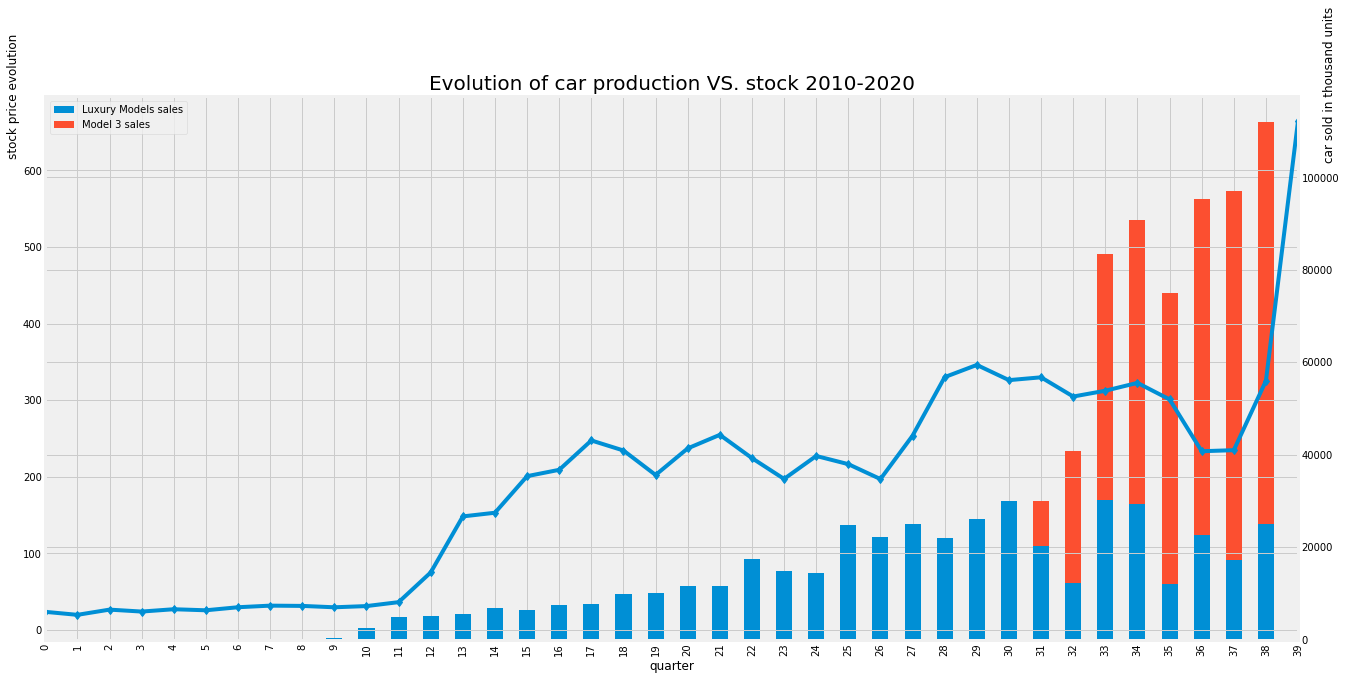

In [165]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_xlabel('quarter')
ax1.set_ylabel('stock price evolution')
ax1.yaxis.set_label_coords(-0.02, 1)

ax2 = ax1.twinx()
ax2.set_ylabel('car sold in thousand units')
ax2.yaxis.set_label_coords(1.02, 1.02)
df_plot[['Luxury Models sales', 'Model 3 sales']].plot(kind='bar', ax=ax1,stacked=True)
df_plot['Adj Close'].plot(kind='line', marker='d', ax=ax2)

ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
plt.title('Evolution of car production VS. stock 2010-2020', fontsize=20)
plt.savefig(f'../DataSets/Tesla_car_sales/car_production_stock_evolution.png' , dpi=300)


Generation of a Correlation Matrix :
- strong correlation between the stock evolution and the Luxury Model Sales / All Mod sales

In [143]:
corr_car = dfmerged_stock_quarter_car.corr()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_car, annot=True)
plt.title('correlation Matrix Car production VS. Stock')
plt.savefig('../DataSets/Tesla_car_sales/car_correlation.png' , dpi=fig.dpi)


## Prophet Car Production

Using Prophet to predict the future Tesla Car productions, based on the current production of Luxury Models & Model 3

In [144]:
df_plot_date = df_plot.copy()

In [145]:
df_plot_date.set_index('Date', inplace=True)

In [78]:
df_prophet_prod = df_plot_date

In [79]:
df_prophet_prod

,index,Adj Close,Model 3 sales,Luxury Models sales,Total_Model_Sales
Date,,,,,
2010-06-30,0,23.860000,0.0,100.0,100.0
2010-09-30,1,19.929844,0.0,100.0,100.0
2010-12-31,2,26.737656,0.0,100.0,100.0
2011-03-31,3,24.217742,0.0,198.0,198.0
2011-06-30,4,27.248254,0.0,198.0,198.0
2011-09-30,5,25.873906,0.0,198.0,198.0
2011-12-31,6,29.852857,0.0,200.0,200.0
2012-03-31,7,31.940968,0.0,99.0,99.0
2012-06-30,8,31.587460,0.0,89.0,89.0


In [80]:
df_prophet_prod.dropna(inplace=True)

In [41]:
df_prophet_prod = df_prophet_prod[['Total_Model_Sales']]

In [81]:
df_prophet_prod.reset_index(inplace=True)

In [43]:
df_prophet_prod.columns = ['ds','y']

df_prophet_prod

,ds,y
0,2010-06-30,100.0
1,2010-09-30,100.0
2,2010-12-31,100.0
3,2011-03-31,198.0
4,2011-06-30,198.0
5,2011-09-30,198.0
6,2011-12-31,200.0
7,2012-03-31,99.0
8,2012-06-30,89.0
9,2012-09-30,321.0


In [44]:
# scaleddfmerged_stock_quarter_car = dfmerged_stock_quarter_car.set_index('Date', inplace=True)

In [45]:
prophet_instance_car = Prophet(interval_width=0.95)

In [46]:
prophet_instance_car

In [47]:
prophet_instance_car.fit(df_prophet_prod)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future_car  = prophet_instance_car.make_future_dataframe(periods=16, freq = 'q')

In [49]:
forecast_car = prophet_instance_car.predict(future_car)

In [50]:
forecast_car

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-30,27218.853312,-48381.576475,9069.884770,27218.853312,27218.853312,-45579.885720,-45579.885720,-45579.885720,-45579.885720,-45579.885720,-45579.885720,0.0,0.0,0.0,-18361.032408
1,2010-09-30,29466.306369,-40633.693763,17513.714125,29466.306369,29466.306369,-41900.028082,-41900.028082,-41900.028082,-41900.028082,-41900.028082,-41900.028082,0.0,0.0,0.0,-12433.721713
2,2010-12-31,31713.759428,-38049.195808,22198.910093,31713.759428,31713.759428,-39989.570434,-39989.570434,-39989.570434,-39989.570434,-39989.570434,-39989.570434,0.0,0.0,0.0,-8275.811005
3,2011-03-31,33912.354817,-44224.395435,21694.933896,33912.354817,33912.354817,-45940.619329,-45940.619329,-45940.619329,-45940.619329,-45940.619329,-45940.619329,0.0,0.0,0.0,-12028.264513
4,2011-06-30,36135.379043,-33608.908625,27989.273873,36135.379043,36135.379043,-38236.907134,-38236.907134,-38236.907134,-38236.907134,-38236.907134,-38236.907134,0.0,0.0,0.0,-2101.528092
5,2011-09-30,38382.832102,-27762.036294,33187.748671,38382.832102,38382.832102,-35192.877234,-35192.877234,-35192.877234,-35192.877234,-35192.877234,-35192.877234,0.0,0.0,0.0,3189.954868
6,2011-12-31,40630.285166,-19844.259438,39471.312053,40630.285166,40630.285166,-31029.560740,-31029.560740,-31029.560740,-31029.560740,-31029.560740,-31029.560740,0.0,0.0,0.0,9600.724426
7,2012-03-31,42853.309396,-46649.299320,17052.692437,42853.309396,42853.309396,-57222.784696,-57222.784696,-57222.784696,-57222.784696,-57222.784696,-57222.784696,0.0,0.0,0.0,-14369.475300
8,2012-06-30,45076.333629,-42208.647901,14636.674922,45076.333629,45076.333629,-59850.679382,-59850.679382,-59850.679382,-59850.679382,-59850.679382,-59850.679382,0.0,0.0,0.0,-14774.345753
9,2012-09-30,47323.786701,-40110.977774,20943.361387,47323.786701,47323.786701,-55366.395630,-55366.395630,-55366.395630,-55366.395630,-55366.395630,-55366.395630,0.0,0.0,0.0,-8042.608929


In [51]:
tsla_car = forecast_car[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

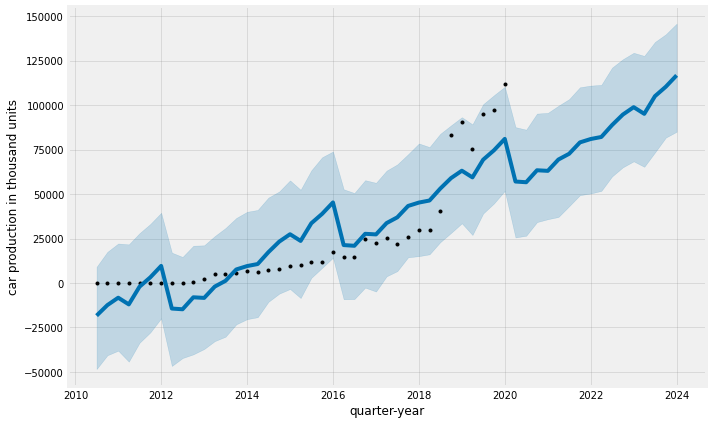

In [52]:
prophet_instance_car.plot(tsla_car, uncertainty=True, xlabel='quarter-year',ylabel='car production in thousand units')
plt.savefig(f'../DataSets/Tesla_car_sales/Prophet_prediction_car_production.png', dpi=fig.dpi)

In [53]:
# df_car_prophet = df_TSLA['y'].reset_index(drop=False)

## Prophet Stock Production

Using Prophet to predict the future of Stocks productions, based on the current production of Luxury Models & Model 3

In [86]:
df_prophet_prod_stock = df_plot_date

In [87]:
df_prophet_prod_stock

,Date,index,Adj Close,Model 3 sales,Luxury Models sales,Total_Model_Sales
0,2010-06-30,0,23.860000,0.0,100.0,100.0
1,2010-09-30,1,19.929844,0.0,100.0,100.0
2,2010-12-31,2,26.737656,0.0,100.0,100.0
3,2011-03-31,3,24.217742,0.0,198.0,198.0
4,2011-06-30,4,27.248254,0.0,198.0,198.0
5,2011-09-30,5,25.873906,0.0,198.0,198.0
6,2011-12-31,6,29.852857,0.0,200.0,200.0
7,2012-03-31,7,31.940968,0.0,99.0,99.0
8,2012-06-30,8,31.587460,0.0,89.0,89.0
9,2012-09-30,9,29.788730,0.0,321.0,321.0


In [92]:
df_prophet_prod_stock = df_prophet_prod[['Date','Adj Close']]

In [93]:
df_prophet_prod_stock

,Date,Adj Close
0,2010-06-30,23.860000
1,2010-09-30,19.929844
2,2010-12-31,26.737656
3,2011-03-31,24.217742
4,2011-06-30,27.248254
5,2011-09-30,25.873906
6,2011-12-31,29.852857
7,2012-03-31,31.940968
8,2012-06-30,31.587460
9,2012-09-30,29.788730


In [94]:
# df_prophet_prod_stock.reset_index(inplace=True)

In [95]:
df_prophet_prod_stock.columns = ['ds','y']

df_prophet_prod_stock

,ds,y
0,2010-06-30,23.860000
1,2010-09-30,19.929844
2,2010-12-31,26.737656
3,2011-03-31,24.217742
4,2011-06-30,27.248254
5,2011-09-30,25.873906
6,2011-12-31,29.852857
7,2012-03-31,31.940968
8,2012-06-30,31.587460
9,2012-09-30,29.788730


In [68]:
# scaleddfmerged_stock_quarter_car = dfmerged_stock_quarter_car.set_index('Date', inplace=True)

In [96]:
prophet_instance_stock = Prophet(interval_width=0.95)

In [97]:
prophet_instance_stock.fit(df_prophet_prod_stock)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [98]:
future_stock  = prophet_instance_stock.make_future_dataframe(periods=16, freq = 'q')

In [99]:
forecast_stock = prophet_instance_stock.predict(future_stock)

In [100]:
forecast_stock

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-30,-432.303296,-81.078863,92.986962,-432.303296,-432.303296,437.617711,437.617711,437.617711,437.617711,437.617711,437.617711,0.0,0.0,0.0,5.314414
1,2010-09-30,-423.058596,-70.450571,110.239712,-423.058596,-423.058596,442.162420,442.162420,442.162420,442.162420,442.162420,442.162420,0.0,0.0,0.0,19.103824
2,2010-12-31,-413.813895,-67.879944,112.530432,-413.813895,-413.813895,439.617494,439.617494,439.617494,439.617494,439.617494,439.617494,0.0,0.0,0.0,25.803600
3,2011-03-31,-404.770165,-40.698479,133.818787,-404.770165,-404.770165,450.863911,450.863911,450.863911,450.863911,450.863911,450.863911,0.0,0.0,0.0,46.093746
4,2011-06-30,-395.625950,-50.413813,129.244951,-395.625950,-395.625950,435.815356,435.815356,435.815356,435.815356,435.815356,435.815356,0.0,0.0,0.0,40.189406
5,2011-09-30,-386.381249,-37.217681,145.306087,-386.381249,-386.381249,439.376130,439.376130,439.376130,439.376130,439.376130,439.376130,0.0,0.0,0.0,52.994881
6,2011-12-31,-377.136548,-20.288027,156.103320,-377.136548,-377.136548,447.210757,447.210757,447.210757,447.210757,447.210757,447.210757,0.0,0.0,0.0,70.074209
7,2012-03-31,-367.992333,-42.889953,126.570159,-367.992333,-367.992333,410.948275,410.948275,410.948275,410.948275,410.948275,410.948275,0.0,0.0,0.0,42.955941
8,2012-06-30,-358.848118,-12.385104,166.668087,-358.848118,-358.848118,437.472379,437.472379,437.472379,437.472379,437.472379,437.472379,0.0,0.0,0.0,78.624261
9,2012-09-30,-349.603417,-0.300089,185.037403,-349.603417,-349.603417,442.217043,442.217043,442.217043,442.217043,442.217043,442.217043,0.0,0.0,0.0,92.613626


In [101]:
stock_pred = forecast_stock[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

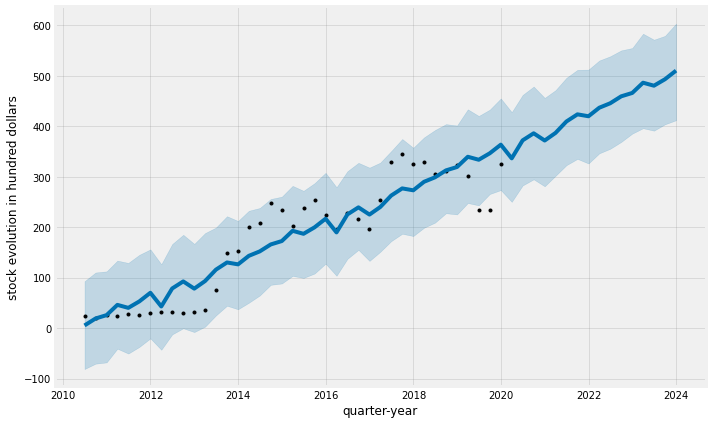

In [102]:
prophet_instance_stock.plot(stock_pred, uncertainty=True, xlabel='quarter-year',ylabel='stock evolution in hundred dollars')
plt.savefig(f'../DataSets/Tesla_car_sales/Prophet_prediction_stock_quarter_production.png', dpi=fig.dpi)

## Ploting Both overlapped predictions

Creating a Dataframe with both Prophet prediction to plot that prediction

In [103]:
df_car_prediction = tsla_car[['ds', 'yhat']]

In [104]:
df_car_prediction.rename(columns={'yhat':'car_predict'}, inplace=True)

C:\Users\langl\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [105]:
df_both_pred = pd.merge(df_car_prediction, stock_pred, on='ds')

In [106]:
df_both_pred.rename(columns={'ds':'date', 'yhat':'stock_predict'}, inplace=True)

In [107]:
df_both_pred = df_both_pred[['date', 'car_predict', 'stock_predict']]

In [108]:
df_both_pred

,date,car_predict,stock_predict
0,2010-06-30,-18361.032408,5.314414
1,2010-09-30,-12433.721713,19.103824
2,2010-12-31,-8275.811005,25.803600
3,2011-03-31,-12028.264513,46.093746
4,2011-06-30,-2101.528092,40.189406
5,2011-09-30,3189.954868,52.994881
6,2011-12-31,9600.724426,70.074209
7,2012-03-31,-14369.475300,42.955941
8,2012-06-30,-14774.345753,78.624261
9,2012-09-30,-8042.608929,92.613626


Droping rows representing

In [109]:
# df_both_pred.drop(df_both_pred.index[0:24], inplace=True)

In [110]:
df_both_pred['date'] = pd.to_datetime(df_both_pred['date'])
df_both_pred['date'] = df_both_pred['date'].dt.date

In [111]:
df_both_pred.set_index('date', inplace=True)

In [112]:
df_both_pred

,car_predict,stock_predict
date,,
2010-06-30,-18361.032408,5.314414
2010-09-30,-12433.721713,19.103824
2010-12-31,-8275.811005,25.803600
2011-03-31,-12028.264513,46.093746
2011-06-30,-2101.528092,40.189406
2011-09-30,3189.954868,52.994881
2011-12-31,9600.724426,70.074209
2012-03-31,-14369.475300,42.955941
2012-06-30,-14774.345753,78.624261


In [113]:
# sns.lineplot(x='date', y='car_predict',data=df_both_pred)
# sns.lineplot(x='date', y='stock_predict',data=df_both_pred)

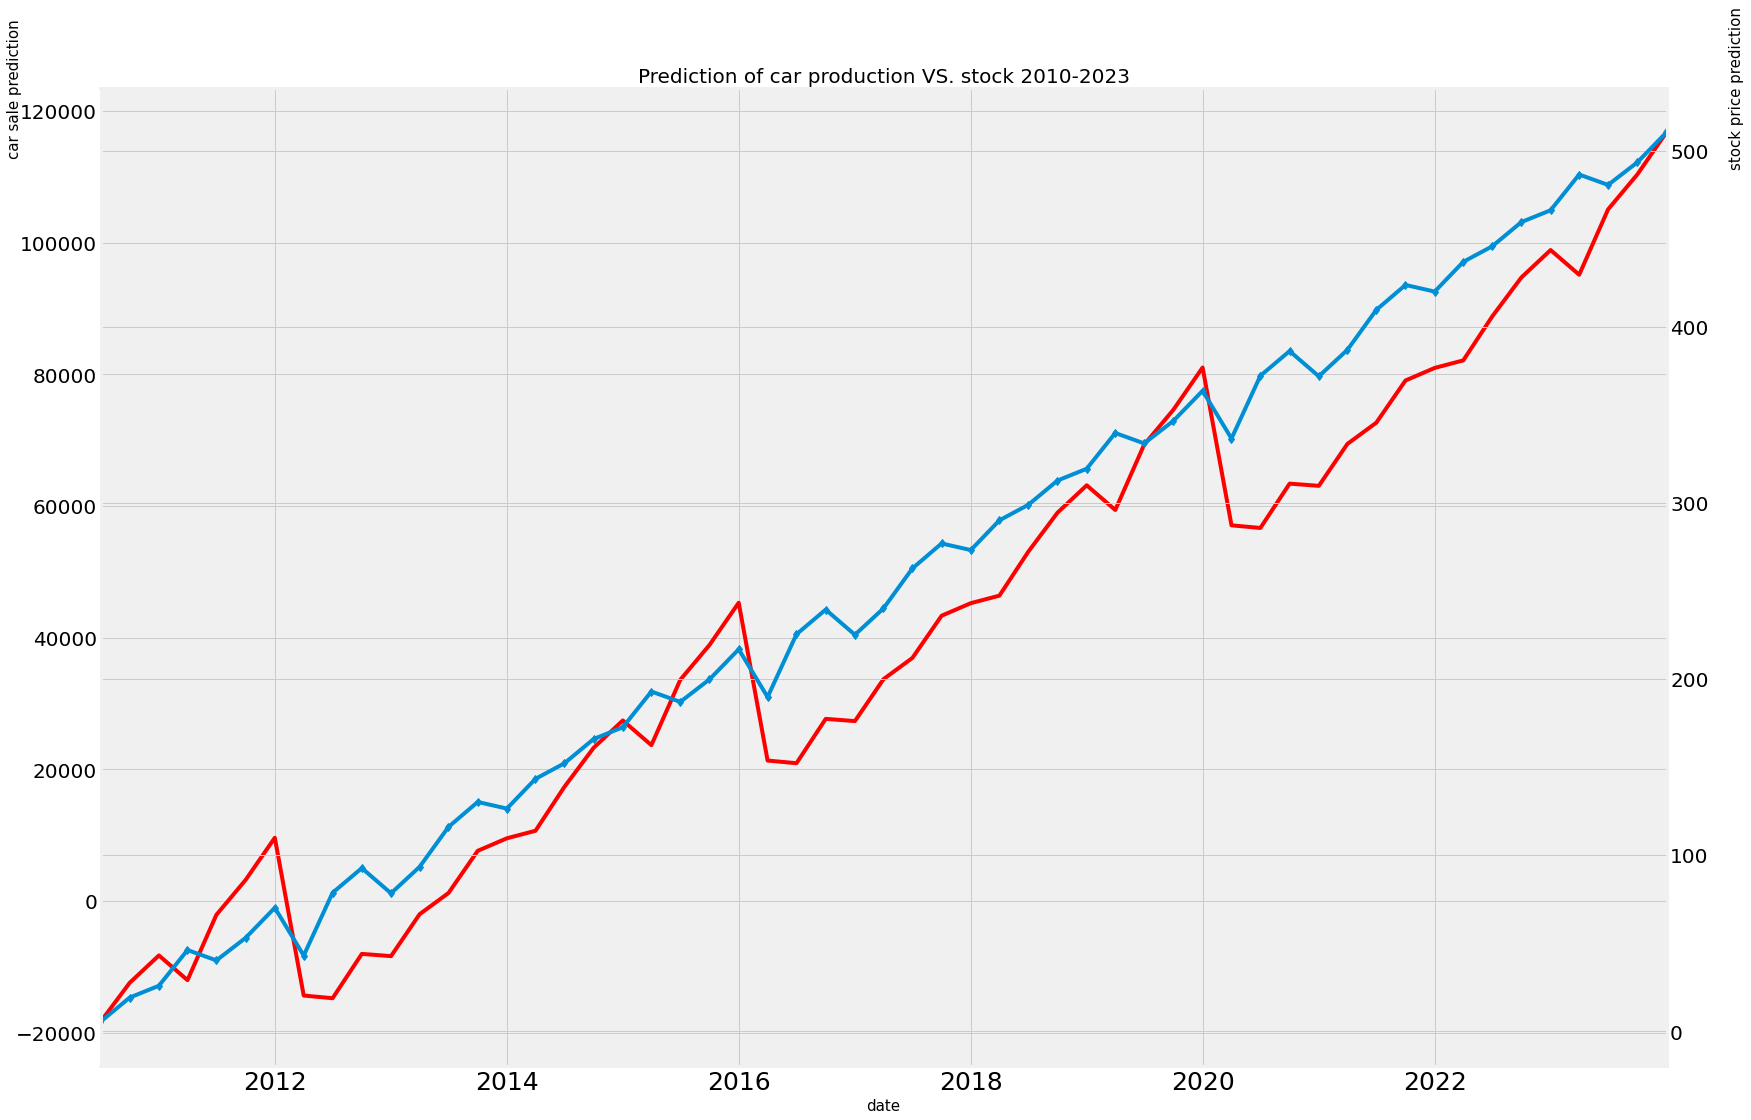

In [172]:
fig, ax1 = plt.subplots(figsize=(25, 18))
ax1.set_xlabel('future quarter', fontsize=15)
ax1.set_ylabel('car sale prediction', fontsize=15)
df_both_pred['car_predict'].plot(kind='line', color='r', ax=ax1)
ax1.tick_params(axis="x", labelsize=25)
ax1.tick_params(axis="y", labelsize=20)
# ax1.set_xticks(fontsize=15)   
ax1.yaxis.set_label_coords(-0.05, 1)

ax2 = ax1.twinx()
ax2.set_ylabel('stock price prediction', fontsize=15)
ax2.yaxis.set_label_coords(1.04, 1)
df_both_pred['stock_predict'].plot(kind='line', marker='d', ax=ax2)
# ax2.set_xticks(fontsize=15)   
ax2.tick_params(axis="x", labelsize=8)
ax2.tick_params(axis="y", labelsize=20)
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()
plt.title('Prediction of car production VS. stock 2010-2023', fontsize=20)
plt.savefig(f'../DataSets/Tesla_car_sales/car_production_stock_evolution.png' , dpi=300)